<a href="https://colab.research.google.com/github/zniero1324/Programming-Assignment-2-Cardiovascular-Examination/blob/main/DevelopmentNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Code Development Notebook

This notebook explain the relationship listed down below:
*   Cardiovascular Health Disease and gender.  
*   Cardiovascular Health Disease and BMI.
*   Cardiovascular Health Disease, BMI and cholesterol.
*   Cardiovascular Health Disease, smoker and physical activity.



**Import all necessary library**

In [57]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import  ipywidgets as ips

**Establish the connection of the database.**

In [21]:
connection = sqlite3.connect('cardiohealth.db')
cursor = connection.cursor()

Inspect the table schema in the 'cardiohealth.db', to identify the table name we will be working on.

In [22]:
sql = '''
SELECT name FROM sqlite_master WHERE type = 'table';
'''

cursor.execute(sql)
cursor.fetchall()

[('medical_examination',)]

Based on the result of the previous command, the table name is 'medical_examination', we can now start to develop a sql command and load the command in panda dataset

In [23]:
sql = '''SELECT * FROM medical_examination '''

cursor.execute(sql)

result = cursor.fetchall()

data_frame = pd.read_sql_query(sql, connection)

##Data Exploration

Let's check the data structure.

1.   Check the first 10 row of the data.



In [24]:
data_frame.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


2.   Let's check the data types, and any missing values.


In [25]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


> Based on the data above, there are 12 columns,and 2 data types - integer, and float. The total number of rows is about 7000.

3. Statistical summary of the numerical column.

In [26]:
data_frame.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


We need to remove the extra gender in for later code, since the instruction clearly state that we only have two gender.

The weight should be fine, since the world shortest man is 6.5kg, and dwarfism is a thing.

Source: https://www.aa.com.tr/en/middle-east/world-s-shortest-man-wishes-to-visit-turkiye-meets-worlds-tallest-man/2972804#:~:text=Ghaderzadeh%2C%2021%2C%20stands%2065.24%20centimeters,the%20Guinness%20Book%20of%20Records.

In [36]:
#Remove unecessary data like the gender, since 3 is not stated in the dataset provided in the instruction.
data_frame = data_frame[data_frame['gender'] != 3]

##Preprocessing and Data Cleaning

Let's check and clean our data or any duplicate.

In [37]:
data_frame.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 69989, dtype: bool

Since the data is too large, we are not able to see if there is any duplicate in our date.

Let's try to list down all the data that have duplicate per row only.

In [38]:
data_frame[data_frame.duplicated()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


No data listed, so no duplicated data.

## Check missing data

Let's check for any missing data in our dataframe

In [39]:
data_frame.isnull()
data_frame.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Since every thing is 0, no missing value and all rows are field.



##Data Analysis





###Analyze the relationship between Cardiovascular Health Disease and gender.

Filter the necessary data.

In [40]:
df_filter = data_frame[['gender', 'cardio']]

Rename the rows to its appropriate name, and drop uncessary data

Source: https://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/

Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [41]:
#Group the dataframe by Gender
df_group_gender = df_filter.groupby(['gender'])

#Count the total counts of gender distribution to cardio
df_group_gender = df_group_gender.value_counts()

# Reshape the result to have cardio as column name, and row name for gender
df_group_gender =df_group_gender.unstack()

#Rename the gender index
df_group_gender.index = ['Female', 'Male']

#display gender
print(df_group_gender)

cardio      0      1
Female  22909  22613
Male    12105  12362


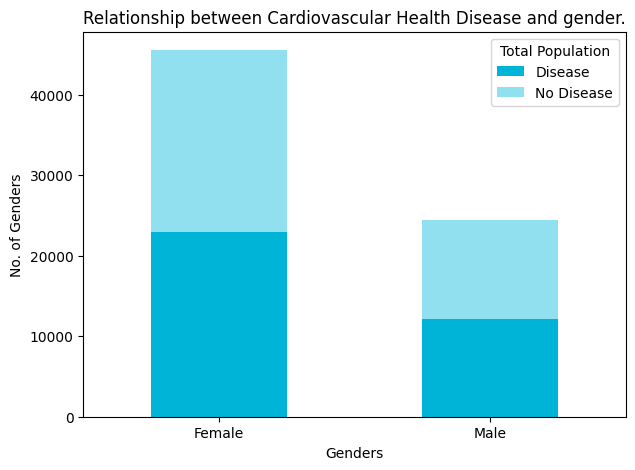

In [42]:
#Visualize the data by using a bar chart
df_group_gender.plot.bar(color=['#00b4d8', '#90e0ef'], rot=0, stacked = 'False', figsize=(7,5))
plt.xlabel("Genders")
plt.ylabel("No. of Genders")
plt.xticks(rotation=0)
plt.legend(title='Total Population', loc='upper right', labels=['Disease', 'No Disease'])
plt.title("Relationship between Cardiovascular Health Disease and gender.")

#Display plot
plt.show()

###Analyze the relationship between Cardiovascular Health Disease and Body Max Index.

Filter the data for weight, height, and Cardiovascular Health Disease.

Compute the BMI from weight and the height.

Source:

*   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html
*   https://www.geeksforgeeks.org/python-pandas-dataframe-loc/



In [43]:
#Isolate the only data for the case
df_filter_bmi = data_frame[['cardio','weight','height']]

#Make a copy of the data because I always recieve a copy warning, anyway it will just copy the data for us to use not touching the previous data.
df_filter_bmi = df_filter_bmi.copy()

#Calculate the BMI, and make a new column in the dataframe.
df_filter_bmi.loc[:, 'bmi'] = round(df_filter_bmi['weight'] / ((df_filter_bmi['height'] / 100) ** 2), 2)

#Remove uneccessary data after bmi is derived.
df_filter_bmi = df_filter_bmi[['cardio','bmi']]

Medical Examination Body Index Mass Average by Cardio (disease, and non disease) Analysis

*Comment: Prefer oneliner code than using unstaked.*


In [51]:
#Group the cardio into two categories, and provide the average BMI
grouped_data = df_filter_bmi.groupby('cardio')['bmi'].mean().round(0).reset_index()


grouped_data

,cardio,bmi
0,0,27.0
1,1,29.0


Change the grouped_data name, and plot the graph.

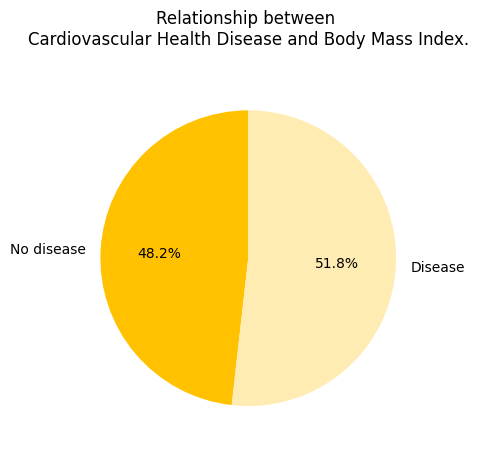

In [56]:
#Visualize the data by using a pie chart
plt.pie(grouped_data['bmi'], labels=['No disease', 'Disease'], colors=['#FFC100', '#FFECB2'], autopct='%1.1f%%', startangle=90)

plt.title(f"Relationship between \nCardiovascular Health Disease and Body Mass Index.\n")

#Display plot
plt.show()

###Analyze the relationship between Cardiovascular Health Disease, Body Max Index and Cholesterol.

Filter the data for weight, height, cardio, and cholesterol.

Compute the BMI from weight and the height.

In [ ]:
#Retreive the important columns in our data.
dataframe_filter = data_frame[['cardio','weight','height', 'cholesterol']]


#Make a copy so it will not conflict when we do the computation.
dataframe_filter = dataframe_filter.copy()

#Derive the BMI from weight and height, the code is refrence from our previous code.
dataframe_filter.loc[:, 'bmi'] = round(dataframe_filter['weight'] / ((dataframe_filter['height'] / 100) ** 2), 2)

#Filter again, and retrieve the neccessary data only.
new_df = dataframe_filter[['cardio', 'cholesterol','bmi']]


Medical Examination of Body Mass Index Average by Cardio and Cholesterol (disease, and non disease) Analysis

Source: https://www.youtube.com/watch?v=qy0fDqoMJx8

Source: https://datatofish.com/replace-values-pandas-dataframe/







In [ ]:
#Copy to avoid conflict because of copy warning
new_df = new_df.copy()

#Rename the numerical values of each category
new_df['cholesterol'] = new_df['cholesterol'].replace({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

"""# Create a cross-tabulation table - another way of unstacking data
crosstab_df = pd.crosstab(new_df['cholesterol'], new_df['cardio'], values=new_df['bmi'], aggfunc='mean')"""

# Group the data by cholesterol and cardio
grouped_data = new_df.groupby(['cholesterol', 'cardio'])

# Calculate the average Body Mass index of each group
chol_cd_mean = grouped_data.mean().round()

# Reshape the result to have cadio as column name, and row name for cholesterol
chol_cd_mean = chol_cd_mean.unstack()

chol_cd_mean

bmi      
cardio                0     1
cholesterol                  
Above Normal       28.0  29.0
Normal             26.0  28.0
Well Above Normal  28.0  30.0

Create a grouped bar chart to visualize the average BMI distribution

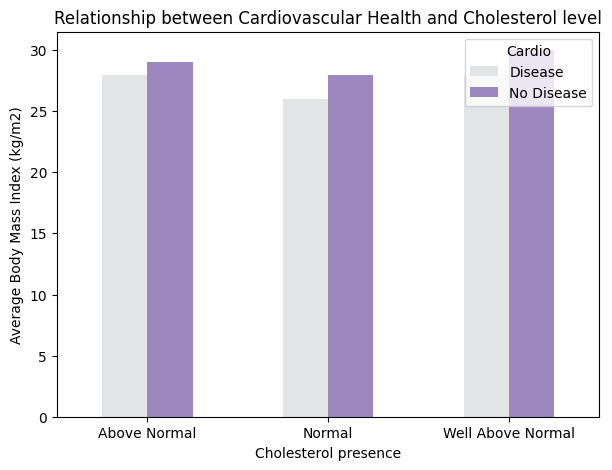

In [ ]:
#Visualize the data by using a bar chart
chol_cd_mean.plot.bar(color=['#e2e4e6', '#9d87bf', '#faeccc'], rot=0, figsize=(7,5))

plt.xlabel("Cholesterol presence")
plt.ylabel(f"Average Body Mass Index (kg/m2)")
plt.legend(title='Cardio', loc='upper right', labels=['Disease', 'No Disease'])
plt.title(f"Relationship between Cardiovascular Health and Cholesterol level")

#Display plot
plt.show()

###Analyze the relationship between Cardiovascular Health Disease, Smoking and Physical activity.

Filter the necessary data, and ready the data for plotting.

In [ ]:
#Retreive the important columns in our data.
dataframe_filter = data_frame[['cardio','active', 'smoke']]

dataframe_filter = dataframe_filter.copy()

dataframe_filter['smoke'] = dataframe_filter['smoke'].replace({0: 'non-smoker', 1: 'smoker'})
dataframe_filter['active'] = dataframe_filter['active'].replace({0: 'inactive', 1: 'active'})

Medical Examination Cardio Distribution by Physical and Smoking Analysis

In [ ]:
# Group the data by activem, smoke, and cardio
grouped_data = dataframe_filter.groupby(['active', 'smoke','cardio'])

# Calculate the total population for cardio
cardio_physical_smoker = grouped_data.size()

# Reshape the result to have cadio as column name, and row name
cardio_physical_smoker = cardio_physical_smoker.unstack()

Create a grouped bar chart to visualize the distribution of the distribution of cardiovascular disease by smoker and non-smoker, and if they are physically active or non physically active.

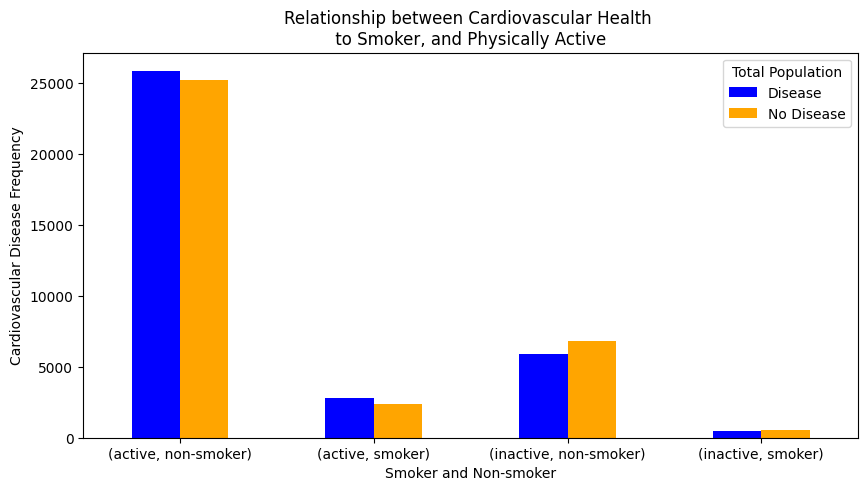

In [ ]:
#Visualize the data by using a bar chart
cardio_physical_smoker.plot.bar(color=['blue', 'orange', 'green'], rot=0, figsize=(10,5))

plt.xlabel("Smoker and Non-smoker")
plt.ylabel(f"Cardiovascular Disease Frequency")
plt.legend(title='Total Population', loc='upper right', labels=['Disease', 'No Disease'])
plt.title(f"Relationship between Cardiovascular Health \n to Smoker, and Physically Active ")

#Display plot
plt.show()